<h1 style="color:#2192f1" align="center"> LINEAR REGRESSION</h1>


<h2 align="center" style="color:#f0e912">IMPORT LIBRARIES</h2>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2 align="center" style="color:#f0e912">DATA EXPLORATION</h2>


In [4]:
df_train = pd.read_csv("data/randomly_generated/train.csv")
df_test = pd.read_csv("data/randomly_generated/test.csv")

In [5]:
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
df_train["y"].isnull().sum()
# Drop the rows where at least one element is missing
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)

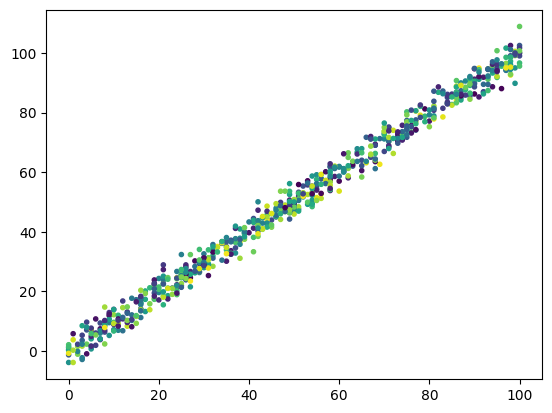

In [7]:
colors = np.random.uniform(15, 80, len(df_train["x"]))
fig, ax = plt.subplots()
ax.scatter(df_train["x"], df_train["y"], c=colors, marker='.')

In [8]:
X = df_train["x"].values.reshape(-1, 1)
y = df_train["y"].values.reshape(-1, 1)

<h2 align="center" style="color:#f0e912">TRAINING</h2>


In [9]:
# Intercept feature
i_term = np.ones((len(X), 1))
# Add intercept feature in other features
X = np.concatenate((i_term, X), axis=1)
# Initialize weights with 0
w = np.zeros((X.shape[1], 1))
# Weights history
weights_history = []

In [10]:
# Hypothesis function
def h_function(x):
    return (w.T @ x).item()

In [11]:
#
def error(i):
    return h_function(X[i]) - y[i]

In [12]:
# Cost function
def cost_function():
    return np.sum([error(i) ** 2 for i in range(len(X))]) / len(X)

In [14]:
"""
Gradient descent algorithm with 3 approach
 - Batch Gradient Descent (BGD)
 - Stochastic Gradient Descent (SGD)
 - Mini Batch Gradient Descent (MBGD)
"""
def gradient_descent(epsilon=0.001, n=100, type="BGD", alpha=0.0001):
    global w
    if type == "BGD":
        cost = cost_function()
        for _ in range(n):
            for j in range(len(w)):
                grad = np.sum([error(i) * X[i][j] for i in range(len(X))])
                w[j] = w[j] - alpha * (grad / len(X))
            weights_history.append(w.copy())
            new_cost = cost_function()
            difference = abs(new_cost - cost)
            if  difference < epsilon:
                print("Convergence!")
                break
            else:
                cost = new_cost
        print(f"Final weights : {w}")


In [18]:
gradient_descent()

Convergence!
Final weights : [[0.01490042]
 [0.99838285]]


<h3 align="center" style="color:#467BD8">VISUALIZATION</h3>


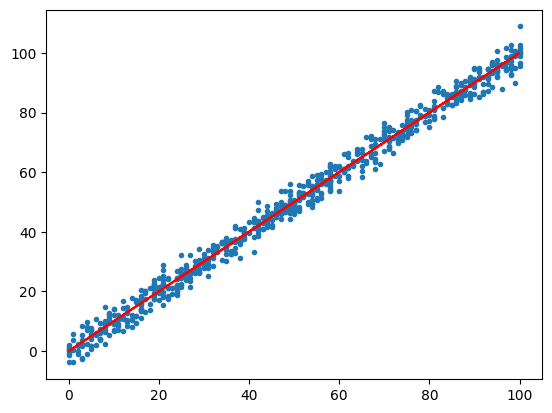

In [19]:
"""
# Plot the hypothesis function using the final weights over the training data
"""

image = np.array([h_function(x) for x in X])
fig, ax = plt.subplots()
ax.scatter(df_train["x"], df_train["y"], marker='.')
ax.plot(image, image, color="red")

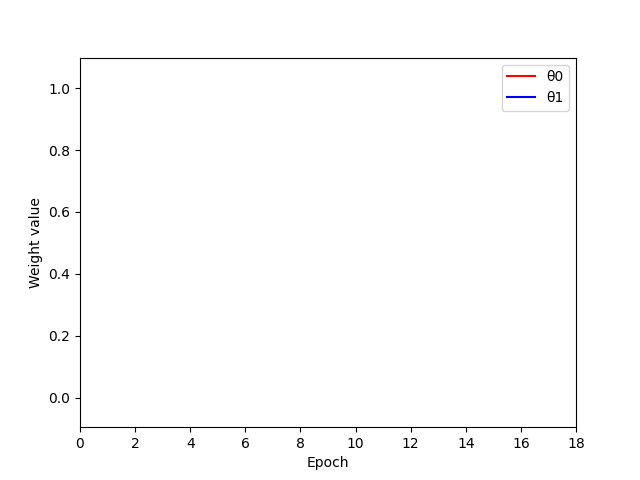

In [20]:
"""
# Plot weights evolution over time
"""

from matplotlib import animation
%matplotlib widget

weights_history = np.array([w.flatten() for w in weights_history])

fig, ax = plt.subplots()
ax.set_xlabel("Epoch")
ax.set_ylabel("Weight value")

epochs = len(weights_history)
n_frames_between_epochs = 10  # nombre de mini-frames entre chaque point
n_frames = (epochs-1) * n_frames_between_epochs + 1

# Interpolation linéaire des poids pour la fluidité
x_smooth = np.linspace(0, epochs-1, n_frames)
w0_smooth = np.interp(x_smooth, np.arange(epochs), weights_history[:,0])
w1_smooth = np.interp(x_smooth, np.arange(epochs), weights_history[:,1])

# Limites
ax.set_xlim(0, epochs-1)
ax.set_ylim(np.min(weights_history)-0.1, np.max(weights_history)+0.1)

# Points animés
line0, = ax.plot([], [], "r-", label="θ0")
line1, = ax.plot([], [], "b-", label="θ1")
ax.legend()

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    return line0, line1

def update(frame):
    # Points jusqu'à la frame courante
    x_vals = np.linspace(0, frame/n_frames_between_epochs, frame+1)
    line0.set_data(x_vals, w0_smooth[:frame+1])
    line1.set_data(x_vals, w1_smooth[:frame+1])
    return line0, line1

ani = animation.FuncAnimation(
    fig, update, frames=n_frames,
    init_func=init, blit=True, interval=20, repeat=False
)

plt.show()
